# Time Series HW

## 1.What scale of measurement applies to timeseries data? Is timeseries data continuous or discrete? Why?


* Time series data falls under **interval** scale of measurement, because there’s no meaningful zero. The difference in time is known and easily calculated.


* A time series is continuous when observations are made continuously through time. A time series is discrete when observations are taken at specific times.


## 2.What does ARIMA stand for? Break down and explain each piece in the name.


**ARIMA - AutoRegressive Integrated MovingAverage** 


* The main goal of time series model is to predict or forecast the future values. ARIMA is one of time series model to do that. ARIMA comes from combining AR and MA models. AR(autoregression) method takes past values to predict the future ones. MA (Moving average) takes past and present errors to predict future values.


* A model with a dth difference to fit and ARMA(p,q) model is called an ARIMA process of order (p,d,q). If no differencing is involved in the model, then it becomes simply an ARMA. 

## 3.Using the data in the temperatures/ folder. Write a function that efficiently converts every column to a different temperature scale: one that is more common than Kelvin.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
temperature_df=pd.read_csv('temperatures/temperature.csv',parse_dates=['datetime'])
temperature_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868185,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847789,287.231672,307.391513,304.281841,310.411539,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [7]:
#creating a function to convert temperature values into Celcius.

def f(x):
    x = x-273.15
    return x

celsius=temperature_df.iloc[:,1:37].apply(f, axis=1).round(2)
celsius.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.95,NaN,NaN,NaN
1,11.48,8.93,16.33,8.65,18.72,18.38,20.26,23.45,11.97,11.46,...,12.48,15.07,12.68,14.02,34.44,32.32,37.43,31.25,31.25,30.35
2,11.48,8.93,16.32,8.65,18.72,18.38,20.25,23.46,12.00,11.46,...,12.51,15.10,12.68,14.04,34.44,31.16,37.35,31.25,31.25,30.35
3,11.48,8.94,16.31,8.64,18.71,18.39,20.24,23.48,12.08,11.45,...,12.61,15.18,12.70,14.08,34.24,31.13,37.26,31.25,31.25,30.35
4,11.47,8.95,16.30,8.63,18.71,18.40,20.23,23.50,12.16,11.44,...,12.70,15.26,12.71,14.13,34.00,31.09,37.18,31.25,31.25,30.35


In [8]:
#concatenating two dfs, setting axis =1 helps to concatenate horizontically. If we aren't using axis parameter, 
#concatenation will be done in stack manner.

celcius_df=pd.concat([celsius,temperature_df['datetime']], axis=1)
#celcius_df= celcius_df.set_index('datetime')
celcius_df.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,datetime
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.95,NaN,NaN,NaN,2012-10-01 12:00:00
1,11.48,8.93,16.33,8.65,18.72,18.38,20.26,23.45,11.97,11.46,...,15.07,12.68,14.02,34.44,32.32,37.43,31.25,31.25,30.35,2012-10-01 13:00:00
2,11.48,8.93,16.32,8.65,18.72,18.38,20.25,23.46,12.00,11.46,...,15.10,12.68,14.04,34.44,31.16,37.35,31.25,31.25,30.35,2012-10-01 14:00:00
3,11.48,8.94,16.31,8.64,18.71,18.39,20.24,23.48,12.08,11.45,...,15.18,12.70,14.08,34.24,31.13,37.26,31.25,31.25,30.35,2012-10-01 15:00:00
4,11.47,8.95,16.30,8.63,18.71,18.40,20.23,23.50,12.16,11.44,...,15.26,12.71,14.13,34.00,31.09,37.18,31.25,31.25,30.35,2012-10-01 16:00:00


## 4.Write a function that efficiently fills in missing values in every column, excluding trailing NANs. That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end.


In [9]:
def interpolate(y):
    for i in y:
        if i!="datetime":
            #y[i]= y[i].interpolate().ffill().where(y[i].bfill().notnull())
            y[i]= y[i].interpolate()
interpolate(celcius_df)
celcius_df.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,datetime
45248,14.86,8.85,28.92,7.67,20.40,19.00,16.39,21.56,12.57,16.41,...,11.83,1.98,14.93,12.79,21.0,17.87,26.22,26.22,21.0,2017-11-29 20:00:00
45249,14.86,9.74,28.92,8.50,22.53,19.59,17.46,22.44,13.30,17.55,...,11.83,0.98,12.87,12.79,21.0,17.87,26.22,26.22,21.0,2017-11-29 21:00:00
45250,14.86,10.24,28.92,9.60,22.81,19.43,18.19,23.10,13.29,16.56,...,11.83,0.33,10.79,12.79,21.0,17.87,26.22,26.22,21.0,2017-11-29 22:00:00
45251,14.86,9.87,28.92,9.81,22.50,19.46,19.00,24.00,12.99,16.02,...,11.83,-0.67,9.02,12.79,21.0,17.87,26.22,26.22,21.0,2017-11-29 23:00:00
45252,14.86,9.13,28.92,9.89,21.78,18.25,18.49,24.00,11.55,12.03,...,11.83,-1.35,7.50,12.79,21.0,17.87,26.22,26.22,21.0,2017-11-30 00:00:00


## 5.Find all cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average.


In [127]:

celcius_df['datetime']= pd.to_datetime(celcius_df['datetime'], errors='coerce')
celcius_df['month']= pd.DatetimeIndex(celcius_df['datetime']).month
celcius_df.head()


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,datetime,month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.95,NaN,NaN,NaN,2012-10-01 12:00:00,10
1,11.48,8.93,16.33,8.65,18.72,18.38,20.26,23.45,11.97,11.46,...,12.68,14.02,34.44,32.32,37.43,31.25,31.25,30.35,2012-10-01 13:00:00,10
2,11.48,8.93,16.32,8.65,18.72,18.38,20.25,23.46,12.00,11.46,...,12.68,14.04,34.44,31.16,37.35,31.25,31.25,30.35,2012-10-01 14:00:00,10
3,11.48,8.94,16.31,8.64,18.71,18.39,20.24,23.48,12.08,11.45,...,12.70,14.08,34.24,31.13,37.26,31.25,31.25,30.35,2012-10-01 15:00:00,10
4,11.47,8.95,16.30,8.63,18.71,18.40,20.23,23.50,12.16,11.44,...,12.71,14.13,34.00,31.09,37.18,31.25,31.25,30.35,2012-10-01 16:00:00,10


In [170]:
#I have created summer months and winter months list. 
x=celcius_df
summer_months= [5,6,7,8,9]
winter_months=[10,11,12,1,2,3,4]
x[x.month.isin(summer_months)]

#Calculated averages for cities during summer months.
avg_summer = x[x.month.isin(summer_months)].iloc[:,0:36].mean().round(2)
avg_summer

Vancouver            16.67
Portland             17.98
San Francisco        18.20
Seattle              16.84
Los Angeles          21.59
San Diego            20.39
Las Vegas            28.69
Phoenix              30.65
Albuquerque          20.55
Denver               18.29
San Antonio          26.89
Dallas               27.02
Houston              27.06
Kansas City          22.81
Minneapolis          19.08
Saint Louis          22.92
Chicago              19.81
Nashville            23.50
Indianapolis         21.17
Atlanta              23.79
Detroit              19.70
Jacksonville         26.34
Charlotte            23.35
Miami                27.69
Pittsburgh           19.75
Toronto              18.37
Philadelphia         21.17
New York             21.22
Montreal             18.12
Boston               19.26
Beersheba            23.89
Tel Aviv District    26.57
Eilat                30.15
Haifa                27.11
Nahariyya            25.48
Jerusalem            25.48
dtype: float64

In [171]:
#Calculated averages for cities during winter months.
avg_winter =x[x.month.isin(winter_months)].iloc[:,0:36].mean().round(2)
avg_winter


Vancouver             6.76
Portland              7.65
San Francisco        13.24
Seattle               7.45
Los Angeles          15.04
San Diego            14.79
Las Vegas            12.85
Phoenix              16.67
Albuquerque           6.95
Denver                3.82
San Antonio          16.36
Dallas               13.90
Houston              16.95
Kansas City           7.13
Minneapolis          -0.33
Saint Louis           7.11
Chicago               3.64
Nashville             9.90
Indianapolis          5.11
Atlanta              11.73
Detroit               3.08
Jacksonville         17.66
Charlotte            10.56
Miami                23.20
Pittsburgh            4.87
Toronto               2.25
Philadelphia          6.12
New York              6.11
Montreal             -0.27
Boston                4.74
Beersheba            14.44
Tel Aviv District    17.80
Eilat                18.54
Haifa                18.83
Nahariyya            18.00
Jerusalem            16.34
dtype: float64

In [172]:
#created dataframe with the average values and cities
average_df=pd.DataFrame(avg_summer)
average_df.columns=['summer_avg']
average_df['winter_avg']=avg_winter
average_df=average_df.reset_index()
average_df.columns=['city','summer_avg','winter_avg']
average_df

,city,summer_avg,winter_avg
0,Vancouver,16.67,6.76
1,Portland,17.98,7.65
2,San Francisco,18.20,13.24
3,Seattle,16.84,7.45
4,Los Angeles,21.59,15.04
5,San Diego,20.39,14.79
6,Las Vegas,28.69,12.85
7,Phoenix,30.65,16.67
8,Albuquerque,20.55,6.95
9,Denver,18.29,3.82


In [165]:
cityA=[]
cityB=[]

for i in range(len(average_df['city'])):
    city=average_df.iloc[i,0]
    summer_temp=average_df.iloc[i,1]
    winter_temp=average_df.iloc[i,2]
    for j in range(len(average_df['city'])):
        if city!=average_df.iloc[j,0]:
            if (summer_temp>average_df.iloc[j,1]) & (winter_temp<average_df.iloc[j,2]):
                cityA.append(city)
                cityB.append(average_df.iloc[j,0])
                print(city," temperature ",summer_temp," is hotter than ",average_df.iloc[j,0],average_df.iloc[j,1])
                print(city," temperature ",winter_temp," is colder than ",average_df.iloc[j,0],average_df.iloc[j,2])
            else:
                #cityA.append(city)
                #cityB.append(average_df.iloc[j,0])
                print(city," temperature ",summer_temp," is not hotter than ",average_df.iloc[j,0],average_df.iloc[j,1])
                print(city," temperature ",winter_temp," is not colder than ",average_df.iloc[j,0],average_df.iloc[j,2])
        
        


Vancouver  temperature  16.67  is not hotter than  Portland 17.98
Vancouver  temperature  6.76  is not colder than  Portland 7.65
Vancouver  temperature  16.67  is not hotter than  San Francisco 18.2
Vancouver  temperature  6.76  is not colder than  San Francisco 13.24
Vancouver  temperature  16.67  is not hotter than  Seattle 16.84
Vancouver  temperature  6.76  is not colder than  Seattle 7.45
Vancouver  temperature  16.67  is not hotter than  Los Angeles 21.59
Vancouver  temperature  6.76  is not colder than  Los Angeles 15.04
Vancouver  temperature  16.67  is not hotter than  San Diego 20.39
Vancouver  temperature  6.76  is not colder than  San Diego 14.79
Vancouver  temperature  16.67  is not hotter than  Las Vegas 28.69
Vancouver  temperature  6.76  is not colder than  Las Vegas 12.85
Vancouver  temperature  16.67  is not hotter than  Phoenix 30.65
Vancouver  temperature  6.76  is not colder than  Phoenix 16.67
Vancouver  temperature  16.67  is not hotter than  Albuquerque 20.55
V

Los Angeles  temperature  21.59  is not hotter than  Houston 27.06
Los Angeles  temperature  15.04  is not colder than  Houston 16.95
Los Angeles  temperature  21.59  is not hotter than  Kansas City 22.81
Los Angeles  temperature  15.04  is not colder than  Kansas City 7.13
Los Angeles  temperature  21.59  is not hotter than  Minneapolis 19.08
Los Angeles  temperature  15.04  is not colder than  Minneapolis -0.33
Los Angeles  temperature  21.59  is not hotter than  Saint Louis 22.92
Los Angeles  temperature  15.04  is not colder than  Saint Louis 7.11
Los Angeles  temperature  21.59  is not hotter than  Chicago 19.81
Los Angeles  temperature  15.04  is not colder than  Chicago 3.64
Los Angeles  temperature  21.59  is not hotter than  Nashville 23.5
Los Angeles  temperature  15.04  is not colder than  Nashville 9.9
Los Angeles  temperature  21.59  is not hotter than  Indianapolis 21.17
Los Angeles  temperature  15.04  is not colder than  Indianapolis 5.11
Los Angeles  temperature  21.59

Las Vegas  temperature  12.85  is colder than  Jerusalem 16.34
Phoenix  temperature  30.65  is not hotter than  Vancouver 16.67
Phoenix  temperature  16.67  is not colder than  Vancouver 6.76
Phoenix  temperature  30.65  is not hotter than  Portland 17.98
Phoenix  temperature  16.67  is not colder than  Portland 7.65
Phoenix  temperature  30.65  is not hotter than  San Francisco 18.2
Phoenix  temperature  16.67  is not colder than  San Francisco 13.24
Phoenix  temperature  30.65  is not hotter than  Seattle 16.84
Phoenix  temperature  16.67  is not colder than  Seattle 7.45
Phoenix  temperature  30.65  is not hotter than  Los Angeles 21.59
Phoenix  temperature  16.67  is not colder than  Los Angeles 15.04
Phoenix  temperature  30.65  is not hotter than  San Diego 20.39
Phoenix  temperature  16.67  is not colder than  San Diego 14.79
Phoenix  temperature  30.65  is not hotter than  Las Vegas 28.69
Phoenix  temperature  16.67  is not colder than  Las Vegas 12.85
Phoenix  temperature  30.

San Antonio  temperature  16.36  is not colder than  Denver 3.82
San Antonio  temperature  26.89  is not hotter than  Dallas 27.02
San Antonio  temperature  16.36  is not colder than  Dallas 13.9
San Antonio  temperature  26.89  is not hotter than  Houston 27.06
San Antonio  temperature  16.36  is not colder than  Houston 16.95
San Antonio  temperature  26.89  is not hotter than  Kansas City 22.81
San Antonio  temperature  16.36  is not colder than  Kansas City 7.13
San Antonio  temperature  26.89  is not hotter than  Minneapolis 19.08
San Antonio  temperature  16.36  is not colder than  Minneapolis -0.33
San Antonio  temperature  26.89  is not hotter than  Saint Louis 22.92
San Antonio  temperature  16.36  is not colder than  Saint Louis 7.11
San Antonio  temperature  26.89  is not hotter than  Chicago 19.81
San Antonio  temperature  16.36  is not colder than  Chicago 3.64
San Antonio  temperature  26.89  is not hotter than  Nashville 23.5
San Antonio  temperature  16.36  is not colde

Kansas City  temperature  7.13  is not colder than  Beersheba 14.44
Kansas City  temperature  22.81  is not hotter than  Tel Aviv District 26.57
Kansas City  temperature  7.13  is not colder than  Tel Aviv District 17.8
Kansas City  temperature  22.81  is not hotter than  Eilat 30.15
Kansas City  temperature  7.13  is not colder than  Eilat 18.54
Kansas City  temperature  22.81  is not hotter than  Haifa 27.11
Kansas City  temperature  7.13  is not colder than  Haifa 18.83
Kansas City  temperature  22.81  is not hotter than  Nahariyya 25.48
Kansas City  temperature  7.13  is not colder than  Nahariyya 18.0
Kansas City  temperature  22.81  is not hotter than  Jerusalem 25.48
Kansas City  temperature  7.13  is not colder than  Jerusalem 16.34
Minneapolis  temperature  19.08  is hotter than  Vancouver 16.67
Minneapolis  temperature  -0.33  is colder than  Vancouver 6.76
Minneapolis  temperature  19.08  is hotter than  Portland 17.98
Minneapolis  temperature  -0.33  is colder than  Portlan

Nashville  temperature  9.9  is not colder than  Minneapolis -0.33
Nashville  temperature  23.5  is not hotter than  Saint Louis 22.92
Nashville  temperature  9.9  is not colder than  Saint Louis 7.11
Nashville  temperature  23.5  is not hotter than  Chicago 19.81
Nashville  temperature  9.9  is not colder than  Chicago 3.64
Nashville  temperature  23.5  is not hotter than  Indianapolis 21.17
Nashville  temperature  9.9  is not colder than  Indianapolis 5.11
Nashville  temperature  23.5  is not hotter than  Atlanta 23.79
Nashville  temperature  9.9  is not colder than  Atlanta 11.73
Nashville  temperature  23.5  is not hotter than  Detroit 19.7
Nashville  temperature  9.9  is not colder than  Detroit 3.08
Nashville  temperature  23.5  is not hotter than  Jacksonville 26.34
Nashville  temperature  9.9  is not colder than  Jacksonville 17.66
Nashville  temperature  23.5  is hotter than  Charlotte 23.35
Nashville  temperature  9.9  is colder than  Charlotte 10.56
Nashville  temperature  2

Detroit  temperature  19.7  is not hotter than  Jerusalem 25.48
Detroit  temperature  3.08  is not colder than  Jerusalem 16.34
Jacksonville  temperature  26.34  is not hotter than  Vancouver 16.67
Jacksonville  temperature  17.66  is not colder than  Vancouver 6.76
Jacksonville  temperature  26.34  is not hotter than  Portland 17.98
Jacksonville  temperature  17.66  is not colder than  Portland 7.65
Jacksonville  temperature  26.34  is not hotter than  San Francisco 18.2
Jacksonville  temperature  17.66  is not colder than  San Francisco 13.24
Jacksonville  temperature  26.34  is not hotter than  Seattle 16.84
Jacksonville  temperature  17.66  is not colder than  Seattle 7.45
Jacksonville  temperature  26.34  is not hotter than  Los Angeles 21.59
Jacksonville  temperature  17.66  is not colder than  Los Angeles 15.04
Jacksonville  temperature  26.34  is not hotter than  San Diego 20.39
Jacksonville  temperature  17.66  is not colder than  San Diego 14.79
Jacksonville  temperature  26.

Pittsburgh  temperature  19.75  is not hotter than  Atlanta 23.79
Pittsburgh  temperature  4.87  is not colder than  Atlanta 11.73
Pittsburgh  temperature  19.75  is not hotter than  Detroit 19.7
Pittsburgh  temperature  4.87  is not colder than  Detroit 3.08
Pittsburgh  temperature  19.75  is not hotter than  Jacksonville 26.34
Pittsburgh  temperature  4.87  is not colder than  Jacksonville 17.66
Pittsburgh  temperature  19.75  is not hotter than  Charlotte 23.35
Pittsburgh  temperature  4.87  is not colder than  Charlotte 10.56
Pittsburgh  temperature  19.75  is not hotter than  Miami 27.69
Pittsburgh  temperature  4.87  is not colder than  Miami 23.2
Pittsburgh  temperature  19.75  is not hotter than  Toronto 18.37
Pittsburgh  temperature  4.87  is not colder than  Toronto 2.25
Pittsburgh  temperature  19.75  is not hotter than  Philadelphia 21.17
Pittsburgh  temperature  4.87  is not colder than  Philadelphia 6.12
Pittsburgh  temperature  19.75  is not hotter than  New York 21.22
P

Montreal  temperature  18.12  is hotter than  Vancouver 16.67
Montreal  temperature  -0.27  is colder than  Vancouver 6.76
Montreal  temperature  18.12  is hotter than  Portland 17.98
Montreal  temperature  -0.27  is colder than  Portland 7.65
Montreal  temperature  18.12  is not hotter than  San Francisco 18.2
Montreal  temperature  -0.27  is not colder than  San Francisco 13.24
Montreal  temperature  18.12  is hotter than  Seattle 16.84
Montreal  temperature  -0.27  is colder than  Seattle 7.45
Montreal  temperature  18.12  is not hotter than  Los Angeles 21.59
Montreal  temperature  -0.27  is not colder than  Los Angeles 15.04
Montreal  temperature  18.12  is not hotter than  San Diego 20.39
Montreal  temperature  -0.27  is not colder than  San Diego 14.79
Montreal  temperature  18.12  is not hotter than  Las Vegas 28.69
Montreal  temperature  -0.27  is not colder than  Las Vegas 12.85
Montreal  temperature  18.12  is not hotter than  Phoenix 30.65
Montreal  temperature  -0.27  is n

Beersheba  temperature  14.44  is not colder than  Nashville 9.9
Beersheba  temperature  23.89  is not hotter than  Indianapolis 21.17
Beersheba  temperature  14.44  is not colder than  Indianapolis 5.11
Beersheba  temperature  23.89  is not hotter than  Atlanta 23.79
Beersheba  temperature  14.44  is not colder than  Atlanta 11.73
Beersheba  temperature  23.89  is not hotter than  Detroit 19.7
Beersheba  temperature  14.44  is not colder than  Detroit 3.08
Beersheba  temperature  23.89  is not hotter than  Jacksonville 26.34
Beersheba  temperature  14.44  is not colder than  Jacksonville 17.66
Beersheba  temperature  23.89  is not hotter than  Charlotte 23.35
Beersheba  temperature  14.44  is not colder than  Charlotte 10.56
Beersheba  temperature  23.89  is not hotter than  Miami 27.69
Beersheba  temperature  14.44  is not colder than  Miami 23.2
Beersheba  temperature  23.89  is not hotter than  Pittsburgh 19.75
Beersheba  temperature  14.44  is not colder than  Pittsburgh 4.87
Beer

Nahariyya  temperature  18.0  is not colder than  San Francisco 13.24
Nahariyya  temperature  25.48  is not hotter than  Seattle 16.84
Nahariyya  temperature  18.0  is not colder than  Seattle 7.45
Nahariyya  temperature  25.48  is not hotter than  Los Angeles 21.59
Nahariyya  temperature  18.0  is not colder than  Los Angeles 15.04
Nahariyya  temperature  25.48  is not hotter than  San Diego 20.39
Nahariyya  temperature  18.0  is not colder than  San Diego 14.79
Nahariyya  temperature  25.48  is not hotter than  Las Vegas 28.69
Nahariyya  temperature  18.0  is not colder than  Las Vegas 12.85
Nahariyya  temperature  25.48  is not hotter than  Phoenix 30.65
Nahariyya  temperature  18.0  is not colder than  Phoenix 16.67
Nahariyya  temperature  25.48  is not hotter than  Albuquerque 20.55
Nahariyya  temperature  18.0  is not colder than  Albuquerque 6.95
Nahariyya  temperature  25.48  is not hotter than  Denver 18.29
Nahariyya  temperature  18.0  is not colder than  Denver 3.82
Nahariyy

In [130]:
list_of_tuples = list(zip(cityA, cityB)) 
cities_df = pd.DataFrame(list_of_tuples,columns = ['CityA', 'CityB'])
cities_df

,CityA,CityB
0,Las Vegas,San Francisco
1,Las Vegas,Los Angeles
2,Las Vegas,San Diego
3,Las Vegas,San Antonio
4,Las Vegas,Dallas
...,...,...
121,Beersheba,San Diego
122,Tel Aviv District,Nahariyya
123,Eilat,Miami
124,Eilat,Haifa


In [89]:
df1=pd.DataFrame([city_names])
df1

,city_A,city_B
0,[Jerusalem],[Nahariyya]


In [5]:
temperature_df.columns

Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa',
       'Nahariyya', 'Jerusalem'],
      dtype='object')

In [11]:
def interpolate(x):
    
    for i in x:
        if i!="datetime":
            x[i]= x[i].interpolate(method ='nearest')
           
        
interpolate(temperature_df)
temperature_df.tail()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
45248,2017-11-29 20:00:00,NaN,282.00,NaN,280.82,293.55,292.15,289.54,294.71,285.72,...,290.24,NaN,275.13,288.08,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.89,NaN,281.65,295.68,292.74,290.61,295.59,286.45,...,289.24,NaN,274.13,286.02,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.39,NaN,282.75,295.96,292.58,291.34,296.25,286.44,...,286.78,NaN,273.48,283.94,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.02,NaN,282.96,295.65,292.61,292.15,297.15,286.14,...,284.57,NaN,272.48,282.17,NaN,NaN,NaN,NaN,NaN,NaN
45252,2017-11-30 00:00:00,NaN,282.28,NaN,283.04,294.93,291.40,291.64,297.15,284.70,...,283.42,NaN,271.80,280.65,NaN,NaN,NaN,NaN,NaN,NaN


Performing SARIMA

In [96]:
sarima_df=temperature_df.iloc[:,[0,3,4,5,6,7]]
sarima_df

,datetime,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas
0,10/1/2012 12:00,NaN,NaN,NaN,NaN,NaN
1,10/1/2012 13:00,289.480000,281.800000,291.870000,291.530000,293.410000
2,10/1/2012 14:00,289.474993,281.797217,291.868185,291.533501,293.403141
3,10/1/2012 15:00,289.460618,281.789833,291.862844,291.543355,293.392177
4,10/1/2012 16:00,289.446243,281.782449,291.857503,291.553209,293.381213
...,...,...,...,...,...,...
45248,11/29/2017 20:00,NaN,280.820000,293.550000,292.150000,289.540000
45249,11/29/2017 21:00,NaN,281.650000,295.680000,292.740000,290.610000
45250,11/29/2017 22:00,NaN,282.750000,295.960000,292.580000,291.340000
45251,11/29/2017 23:00,NaN,282.960000,295.650000,292.610000,292.150000


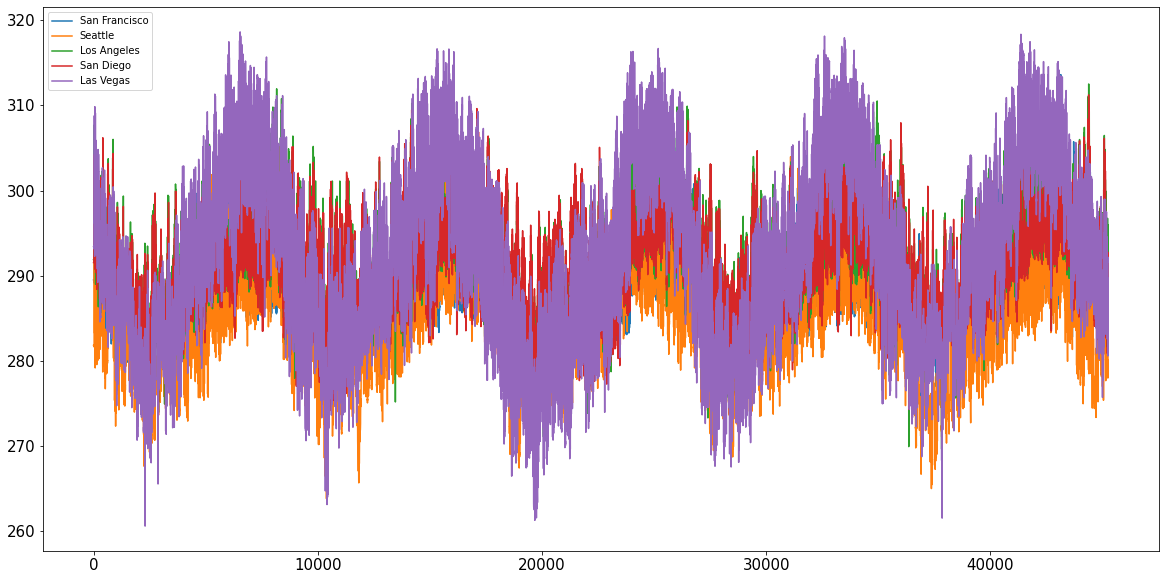

In [122]:
sarima_df.plot(figsize=(20,10),fontsize=15);

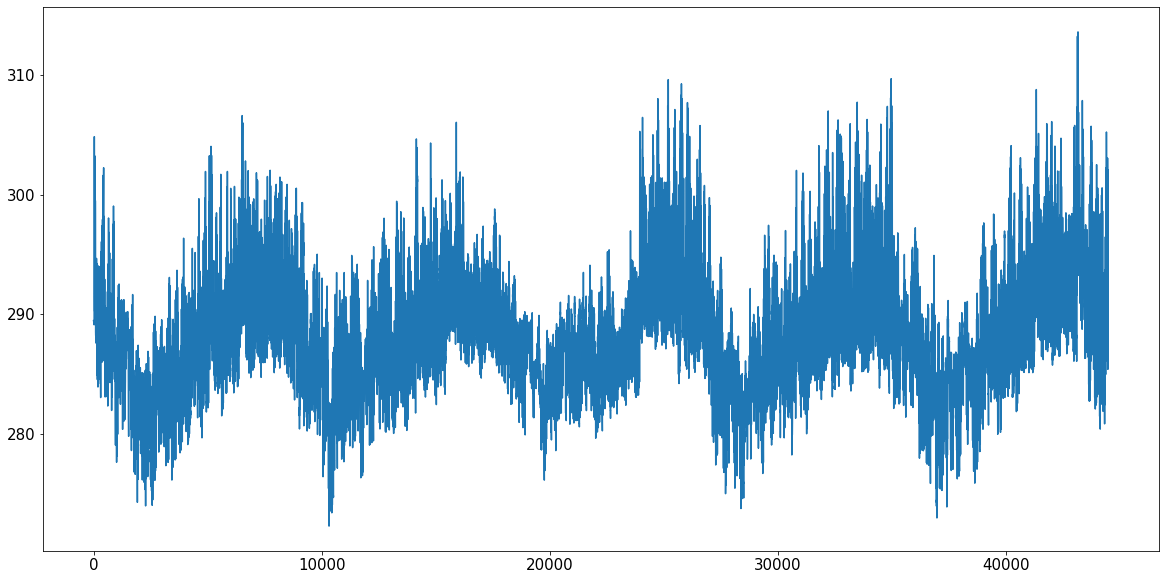

In [124]:
sarima_df['San Francisco'].plot(figsize=(20,10),fontsize=15);

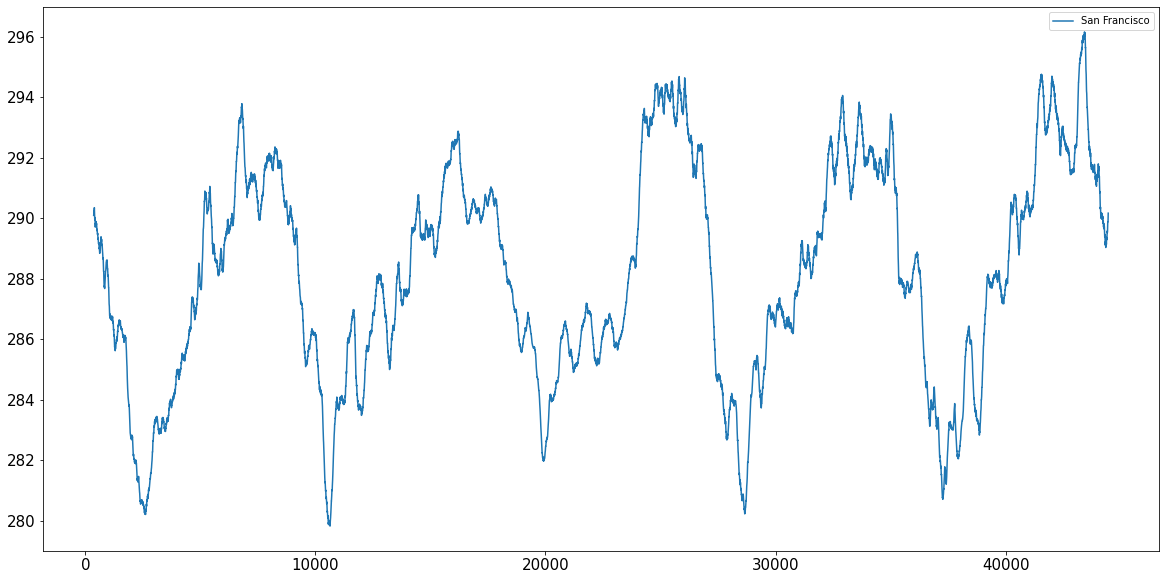

In [123]:
san_francisco=sarima_df[['San Francisco']]
san_francisco.rolling(365).mean().plot(figsize=(20,10),fontsize=15);

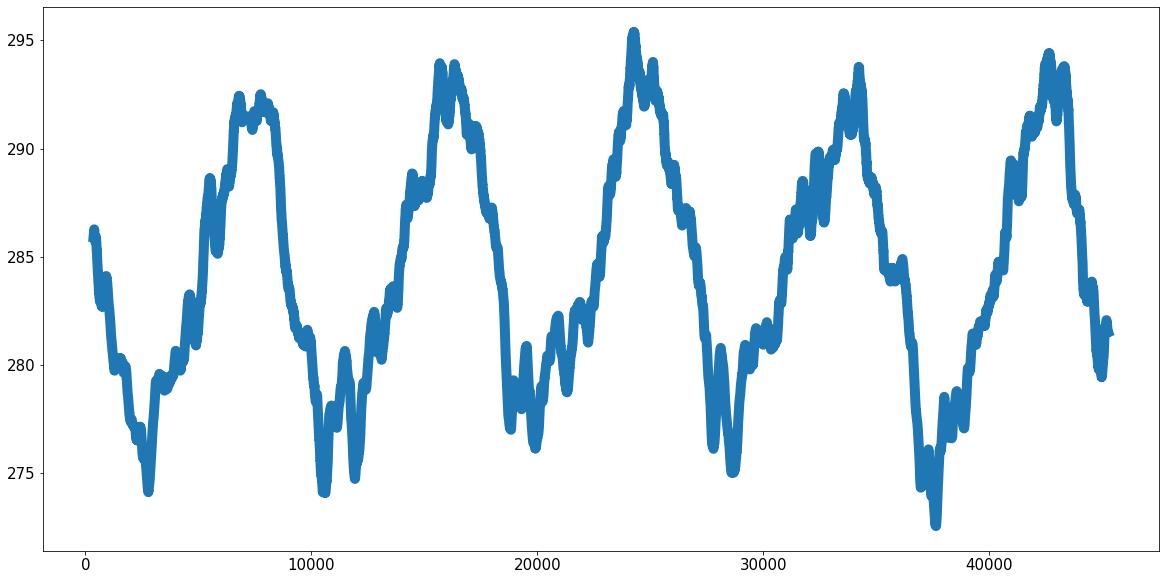

In [98]:
seattle=sarima_df['Seattle']
seattle.rolling(365).mean().plot(figsize=(20,10),linewidth=10,fontsize=15);
for i in range(len(sarima_df)):
    print(i)
    

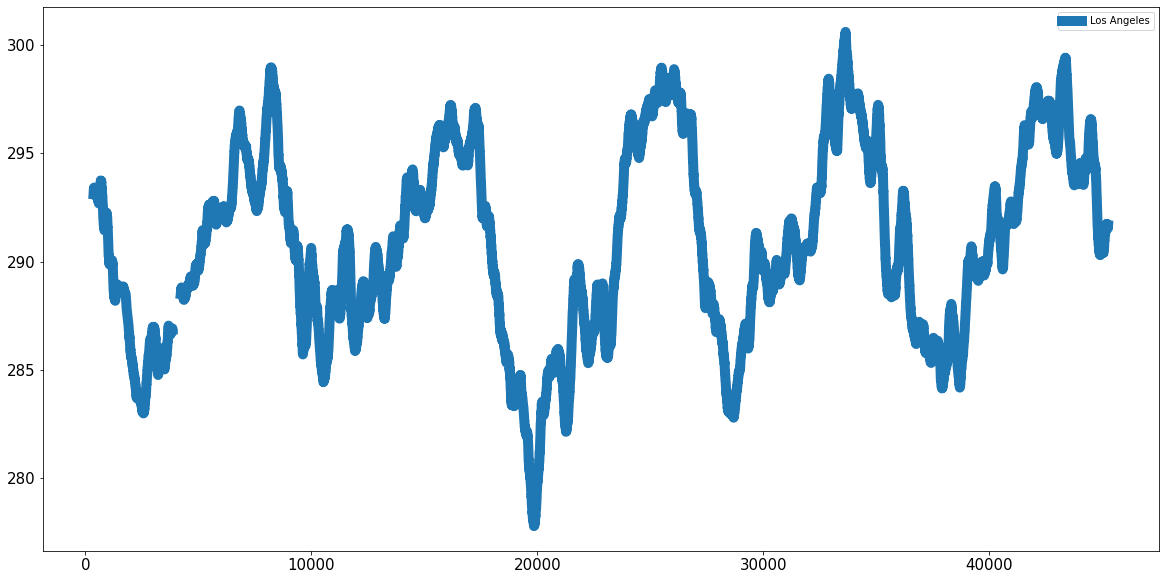

In [103]:
LosAngeles=sarima_df[['Los Angeles']]
LosAngeles.rolling(365).mean().plot(figsize=(20,10),linewidth=10,fontsize=15);

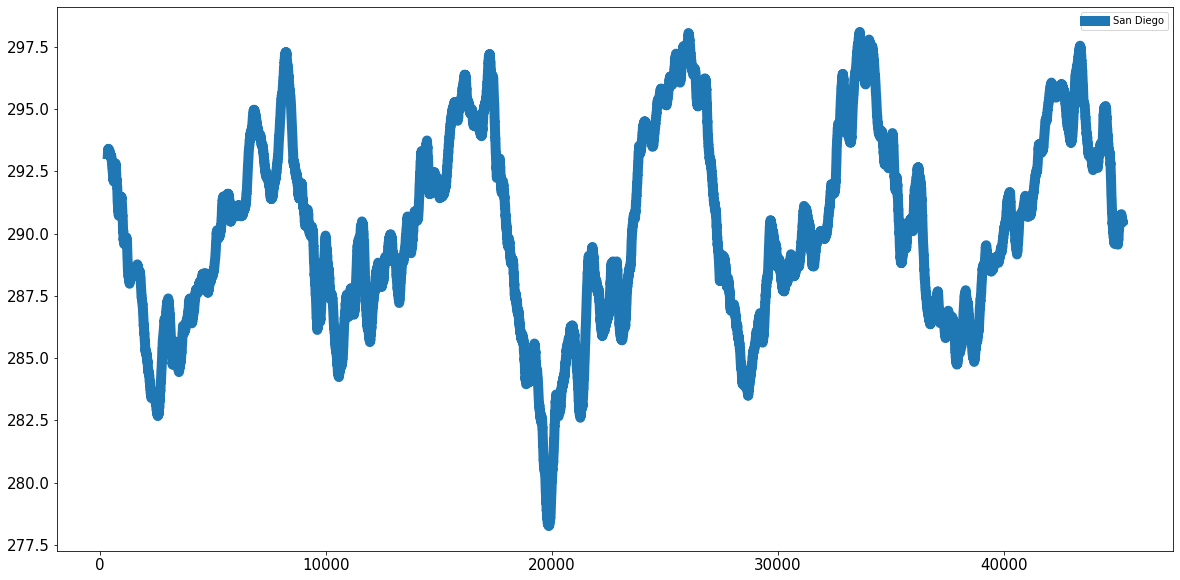

In [106]:
SanDiego= sarima_df[['San Diego']]
SanDiego.rolling(365).mean().plot(figsize=(20,10),linewidth=10,fontsize=15);

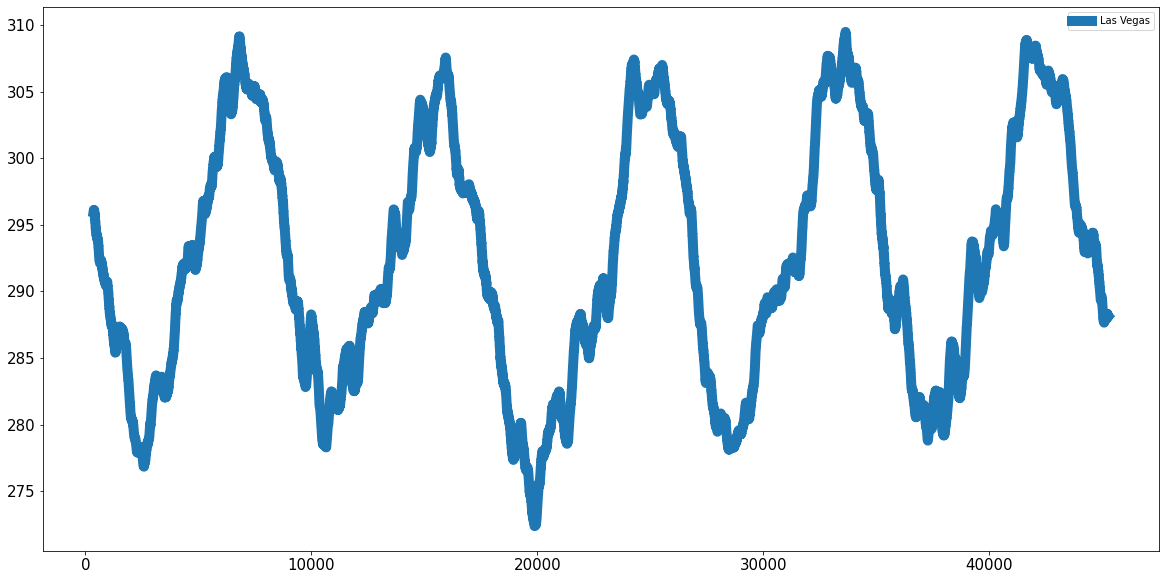

In [107]:
LasVegas=sarima_df[['Las Vegas']]
LasVegas.rolling(365).mean().plot(figsize=(20,10),linewidth=10,fontsize=15);

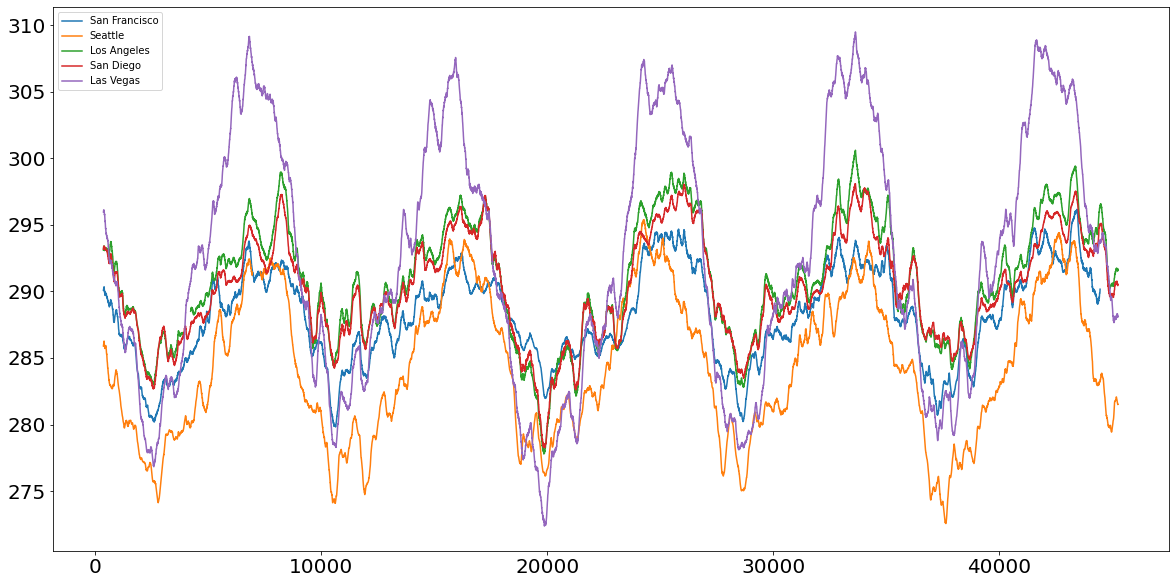

In [120]:
rolling_df= pd.concat([san_francisco.rolling(365).mean(),seattle.rolling(365).mean(),LosAngeles.rolling(365).mean(),
          SanDiego.rolling(365).mean(),LasVegas.rolling(365).mean()],axis=1)

rolling_df.plot(figsize=(20,10),fontsize=20);

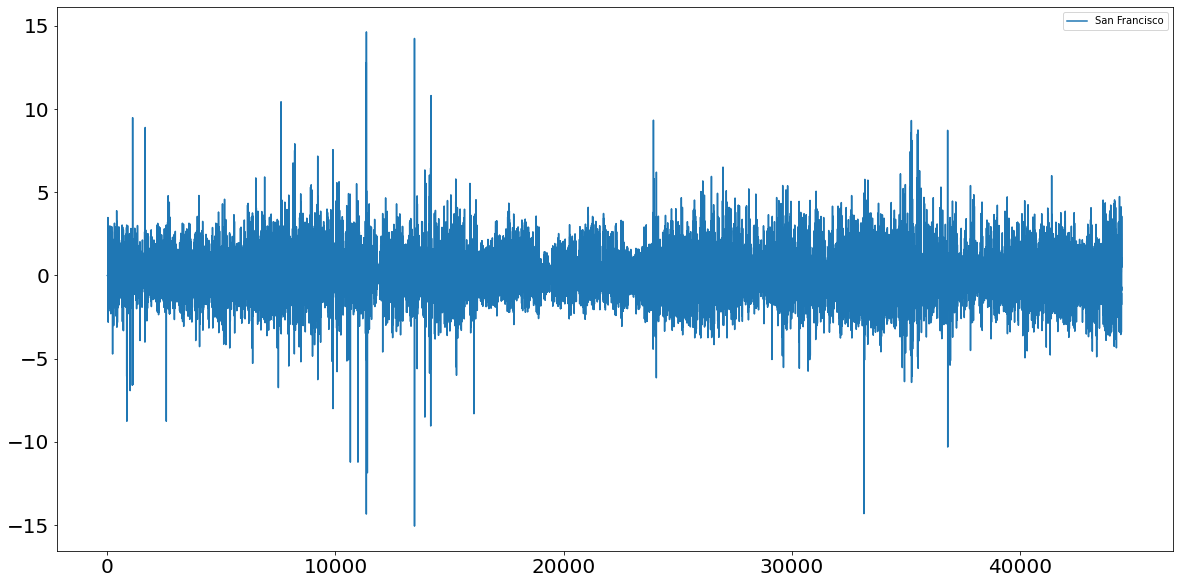

In [121]:
#Seasonal
san_francisco.diff().plot(figsize=(20,10),fontsize=20);

## Interpolating is an useful way to create a smoother time series when resampling

## First Step: IDENTIFICATION

### Handling Missing Values

* After we imported 

### Is it stationary or not

* Its  very important to check whether the time series is stationary or not. If it is stationary only we can apply our ARMA method. 

### How to check stationarity?

    **Plot** 
        * We can plot our data to see the stationarity of our time series.

    **ADF Test**
        * We can do ADF(Augmented Dick Fuller) Test to check stationarity of a time series.

### How to convert non-stationary to stationary?
    
* If its not stationary, we can convert into stationary by taking differencing, using transforms. If its stationary, no need to do differencing, directly we can plot ACF,PACF.

    **Differencing**
    
    **transforms**


#### Plotting ACF,PACF
* From ACF,PACF plot we can find order of AR,MA models **the order of the model explains how many times lag is used.** 

### Second Step: Estimation
#### Fitting the model
* We have to find which model is best.(we can use for loop to check multiple p,q values at same time)

#### summary()
* After we fit our model, we can get our AIC,BIC values from summary. **Select the model which has low AIC value**

### Last Step: Forecasting


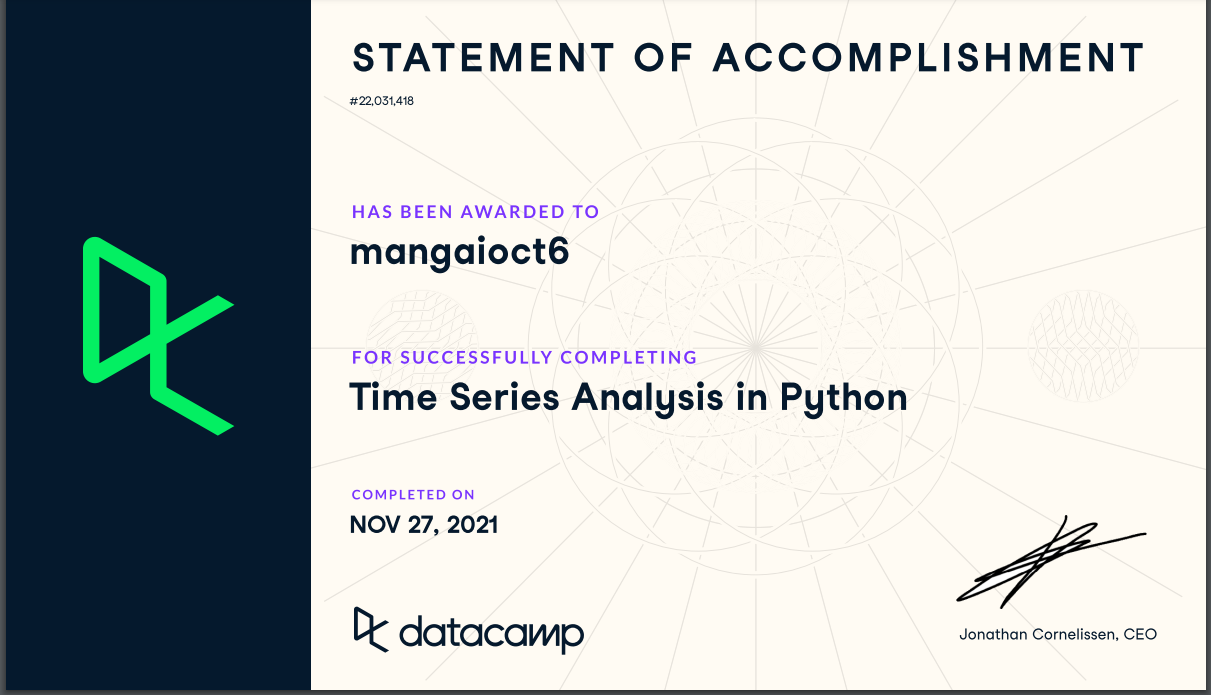